## 1. Scope of the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel the bank using  customer data which includes account information (like balance maintained their tenure with bank etc...)  and customer information.

## Importing Packages

In [2]:
import pandas as pd
import numpy as np 

In [4]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



## 2. Data Acquisition

In [5]:
pd.ExcelFile('../Dataset/Bank_Churn_Messy.xlsx').sheet_names

['Customer_Info', 'Account_Info']

In [ ]:
customer_df = pd.read_excel('../Dataset/Bank_Churn_Messy.xlsx',sheet_name=0)
account_df = pd.read_excel('../Dataset/Bank_Churn_Messy.xlsx',sheet_name=1)
print(customer_df.shape,account_df.shape)

(10001, 8) (10002, 7)


In [323]:
customer_df.CustomerId.nunique()

10000

In [324]:
customer_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary'],
      dtype='object')

In [325]:
account_df.columns

Index(['CustomerId', 'Balance', 'NumOfProducts', 'HasCrCard', 'Tenure',
       'IsActiveMember', 'Exited'],
      dtype='object')

## 3. Data PRocessing
### a. Change Data types

In [326]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [327]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [328]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [329]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


#### 3 a)Inference:
On viewing the data types seems to be good except the balance field inboth the accont_df and income in customer table which will be handleed moving formward


### b) Resolve Data Issues
#### i) Missing Values Handling

In [330]:
customer_df.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [331]:
customer_df[customer_df.isna().any(axis=1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
28,15728693,NaN,574,Germany,Female,NaN,3,-€999999
121,15580203,NaN,674,Spain,Male,NaN,6,-€999999
9389,15756954,NaN,538,France,Female,NaN,2,-€999999


In [332]:
## the values doesnt seem to be useful so its better to drop these rows
customer_df.dropna(inplace=True)
customer_df.shape

(9998, 8)

In [333]:
account_df.isna().sum()

CustomerId        0
Balance           0
NumOfProducts     0
HasCrCard         0
Tenure            0
IsActiveMember    0
Exited            0
dtype: int64

#### ii) Inconsistent type and typos

In [334]:
customer_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary'],
      dtype='object')

In [335]:
customer_df['EstimatedSalary'] = customer_df['EstimatedSalary'].str.replace('€','').astype('float')

In [336]:
customer_df['Geography'].value_counts(dropna=False)
customer_df['Geography'] = np.where(customer_df['Geography'].isin(['French','FRA']),'France',customer_df.Geography)
customer_df['Geography'].value_counts(dropna=False)

Geography
France     5014
Germany    2508
Spain      2476
Name: count, dtype: int64

In [337]:
customer_df.Gender.value_counts()

Gender
Male      5456
Female    4542
Name: count, dtype: int64

In [338]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58
2,15619304,Onio,502,France,Female,42.0,8,113931.57
3,15701354,Boni,699,France,Female,39.0,1,93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10


In [339]:
account_df.columns

Index(['CustomerId', 'Balance', 'NumOfProducts', 'HasCrCard', 'Tenure',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [340]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [341]:
account_df['Balance'] = account_df['Balance'].str.replace('€','').astype('float')

In [342]:
booleant = {"Yes":1,"No":0}
account_df['HasCrCard'] = account_df['HasCrCard'].map(booleant)
account_df['IsActiveMember'] = account_df['IsActiveMember'].map(booleant)
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,0.00,1,1,2,1,1
1,15634602,0.00,1,1,2,1,1
2,15647311,83807.86,1,1,1,1,0
3,15619304,159660.80,3,0,8,0,1
4,15701354,0.00,2,0,1,0,0


#### iii) Duplication check

In [343]:
customer_df.duplicated().sum()

np.int64(1)

In [344]:
customer_df[customer_df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
10000,15628319,Walker,792,France,Female,28.0,4,38190.78


In [345]:
account_df.duplicated().sum()

np.int64(2)

In [346]:
account_df[account_df.duplicated()]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
1,15634602,0.00,1,1,2,1,1
10001,15628319,130142.79,1,0,4,0,0


In [347]:
customer_df.drop_duplicates(inplace=True)
account_df.drop_duplicates(inplace=True)

#### iv) Outliers

In [348]:
customer_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000
mean,1.569094e+07,650.545364,38.922077,5.013204,100092.222656
std,7.193443e+04,96.657932,10.489072,2.892364,57518.775702
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,50974.570000
50%,1.569073e+07,652.000000,37.000000,5.000000,100236.020000
75%,1.575323e+07,718.000000,44.000000,7.000000,149399.700000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000


In [349]:
salary_IQR = (149399.700000 - 50974.570000)
positive_out = 149399.700000 + (1.5*salary_IQR)
negative_out = 50974.570000 - (1.5*salary_IQR)
print(positive_out,negative_out)

297037.395 -96663.125


In [350]:
customer_df[(customer_df.EstimatedSalary > positive_out)|((customer_df.EstimatedSalary < negative_out))]
# no out lier in salary

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary


In [351]:
Q1,Q3 = np.percentile(customer_df.CreditScore,[25,75])
print(Q1,Q3)
IQR = (Q3 - Q1)
positive_out = Q3 + (1.5*IQR)
negative_out = Q1 - (1.5*IQR)
print(positive_out,negative_out)

584.0 718.0
919.0 383.0


In [352]:
customer_df[customer_df.CreditScore<383].shape
# we have 15 negative outliers no positive outliers

(15, 8)

In [353]:
account_df.describe()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,76485.889288,1.530200,0.515100,5.012800,0.515100,0.203700
std,7.193619e+04,62397.405202,0.581654,0.499797,2.892174,0.499797,0.402769
min,1.556570e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,1.569074e+07,97198.540000,1.000000,1.000000,5.000000,1.000000,0.000000
75%,1.575323e+07,127644.240000,2.000000,1.000000,7.000000,1.000000,0.000000
max,1.581569e+07,250898.090000,4.000000,1.000000,10.000000,1.000000,1.000000


In [354]:
Q1,Q3 = np.percentile(account_df.Balance,[25,75])
print(Q1,Q3)
IQR = (Q3 - Q1)
positive_out = Q3 + (1.5*IQR)
negative_out = Q1 - (1.5*IQR)
print(positive_out,negative_out)

0.0 127644.24
319110.60000000003 -191466.36000000002


In [355]:
account_df[(account_df.Balance > positive_out)|((account_df.Balance < negative_out))]
# No outlier sin account_df tooo


,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited


In [356]:
customer_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary'],
      dtype='object')

### c) Create new columns

In [357]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58
2,15619304,Onio,502,France,Female,42.0,8,113931.57
3,15701354,Boni,699,France,Female,39.0,1,93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10


In [358]:
customer_df.EstimatedSalary.max() - customer_df.EstimatedSalary.min()

np.float64(199980.90000000002)

In [359]:
# customer_df.EstimatedSalary.plot.hist(bins=1000)

In [360]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,0.00,1,1,2,1,1
2,15647311,83807.86,1,1,1,1,0
3,15619304,159660.80,3,0,8,0,1
4,15701354,0.00,2,0,1,0,0
5,15737888,125510.82,1,1,2,1,0


In [361]:
account_df.describe()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,76485.889288,1.530200,0.515100,5.012800,0.515100,0.203700
std,7.193619e+04,62397.405202,0.581654,0.499797,2.892174,0.499797,0.402769
min,1.556570e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,1.569074e+07,97198.540000,1.000000,1.000000,5.000000,1.000000,0.000000
75%,1.575323e+07,127644.240000,2.000000,1.000000,7.000000,1.000000,0.000000
max,1.581569e+07,250898.090000,4.000000,1.000000,10.000000,1.000000,1.000000


In [362]:
# Define custom bin edges
bin_edges = [300, 499, 600, 660, 780, 851]
bin_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Use pandas.cut() with custom bins and labels
customer_df['CreditScore_Custom'] = pd.cut(customer_df['CreditScore'], bins=bin_edges, labels=bin_labels, right=False)

print(customer_df[['CreditScore', 'CreditScore_Custom']].head())

# Check the value counts in each bin
print(customer_df['CreditScore_Custom'].value_counts(dropna=False).sort_index())
customer_df

   CreditScore CreditScore_Custom
0          619               Good
1          608               Good
2          502               Fair
3          699          Very Good
4          850          Excellent
CreditScore_Custom
Poor          617
Fair         2415
Good         2265
Very Good    3739
Excellent     961
Name: count, dtype: int64


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,CreditScore_Custom
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,Good
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,Good
2,15619304,Onio,502,France,Female,42.0,8,113931.57,Fair
3,15701354,Boni,699,France,Female,39.0,1,93826.63,Very Good
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,Excellent
...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,Very Good
9996,15569892,Johnstone,516,France,Male,35.0,10,101699.77,Fair
9997,15584532,Liu,709,France,Female,36.0,7,42085.58,Very Good
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,Very Good


In [363]:
# Define custom bin edges
bin_edges = [0, 18, 25, 35, 50, 65, 100]
bin_labels = ['Child', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior', 'Very Senior']

# Use pandas.cut() with custom bins and labels
customer_df['Age_Group_Custom'] = pd.cut(customer_df['Age'], bins=bin_edges, labels=bin_labels, right=False)

print(customer_df[['Age', 'Age_Group_Custom']].head())

# Check the value counts in each bin
print(customer_df['Age_Group_Custom'].value_counts().sort_index())
customer_df

    Age Age_Group_Custom
0  42.0      Middle-Aged
1  41.0      Middle-Aged
2  42.0      Middle-Aged
3  39.0      Middle-Aged
4  43.0      Middle-Aged
Age_Group_Custom
Child             0
Young Adult     457
Adult          3221
Middle-Aged    4924
Senior         1113
Very Senior     282
Name: count, dtype: int64


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,CreditScore_Custom,Age_Group_Custom
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,Good,Middle-Aged
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,Good,Middle-Aged
2,15619304,Onio,502,France,Female,42.0,8,113931.57,Fair,Middle-Aged
3,15701354,Boni,699,France,Female,39.0,1,93826.63,Very Good,Middle-Aged
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,Excellent,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,Very Good,Middle-Aged
9996,15569892,Johnstone,516,France,Male,35.0,10,101699.77,Fair,Middle-Aged
9997,15584532,Liu,709,France,Female,36.0,7,42085.58,Very Good,Middle-Aged
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,Very Good,Middle-Aged


In [364]:
# num_quantiles = 4  # Creates quartiles
# quantile_labels = ['Lower', 'Lower Middle', 'Upper Middle', 'Upper']

# customer_df['income_Group_Custom'] = pd.qcut(customer_df['EstimatedSalary'], q=num_quantiles, labels=quantile_labels, duplicates='drop')
# print(customer_df['income_Group_Custom'].value_counts().sort_index())
# customer_df.drop('income_Group_Custom',axis=1,inplace=True)
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,CreditScore_Custom,Age_Group_Custom
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,Good,Middle-Aged
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,Good,Middle-Aged
2,15619304,Onio,502,France,Female,42.0,8,113931.57,Fair,Middle-Aged
3,15701354,Boni,699,France,Female,39.0,1,93826.63,Very Good,Middle-Aged
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,Excellent,Middle-Aged


In [365]:
customer_df.drop('Tenure',axis=1,inplace=True)

In [366]:
final_df = customer_df.merge(account_df, on = 'CustomerId')
final_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,CreditScore_Custom,Age_Group_Custom,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,101348.88,Good,Middle-Aged,0.00,1,1,2,1,1
1,15647311,Hill,608,Spain,Female,41.0,112542.58,Good,Middle-Aged,83807.86,1,1,1,1,0
2,15619304,Onio,502,France,Female,42.0,113931.57,Fair,Middle-Aged,159660.80,3,0,8,0,1
3,15701354,Boni,699,France,Female,39.0,93826.63,Very Good,Middle-Aged,0.00,2,0,1,0,0
4,15737888,Mitchell,850,Spain,Female,43.0,79084.10,Excellent,Middle-Aged,125510.82,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15606229,Obijiaku,771,France,Male,39.0,96270.64,Very Good,Middle-Aged,0.00,2,0,5,0,0
9993,15569892,Johnstone,516,France,Male,35.0,101699.77,Fair,Middle-Aged,57369.61,1,1,10,1,0
9994,15584532,Liu,709,France,Female,36.0,42085.58,Very Good,Middle-Aged,0.00,1,1,7,1,1
9995,15682355,Sabbatini,772,Germany,Male,42.0,92888.52,Very Good,Middle-Aged,75075.31,2,0,3,0,1


### 4. EDA

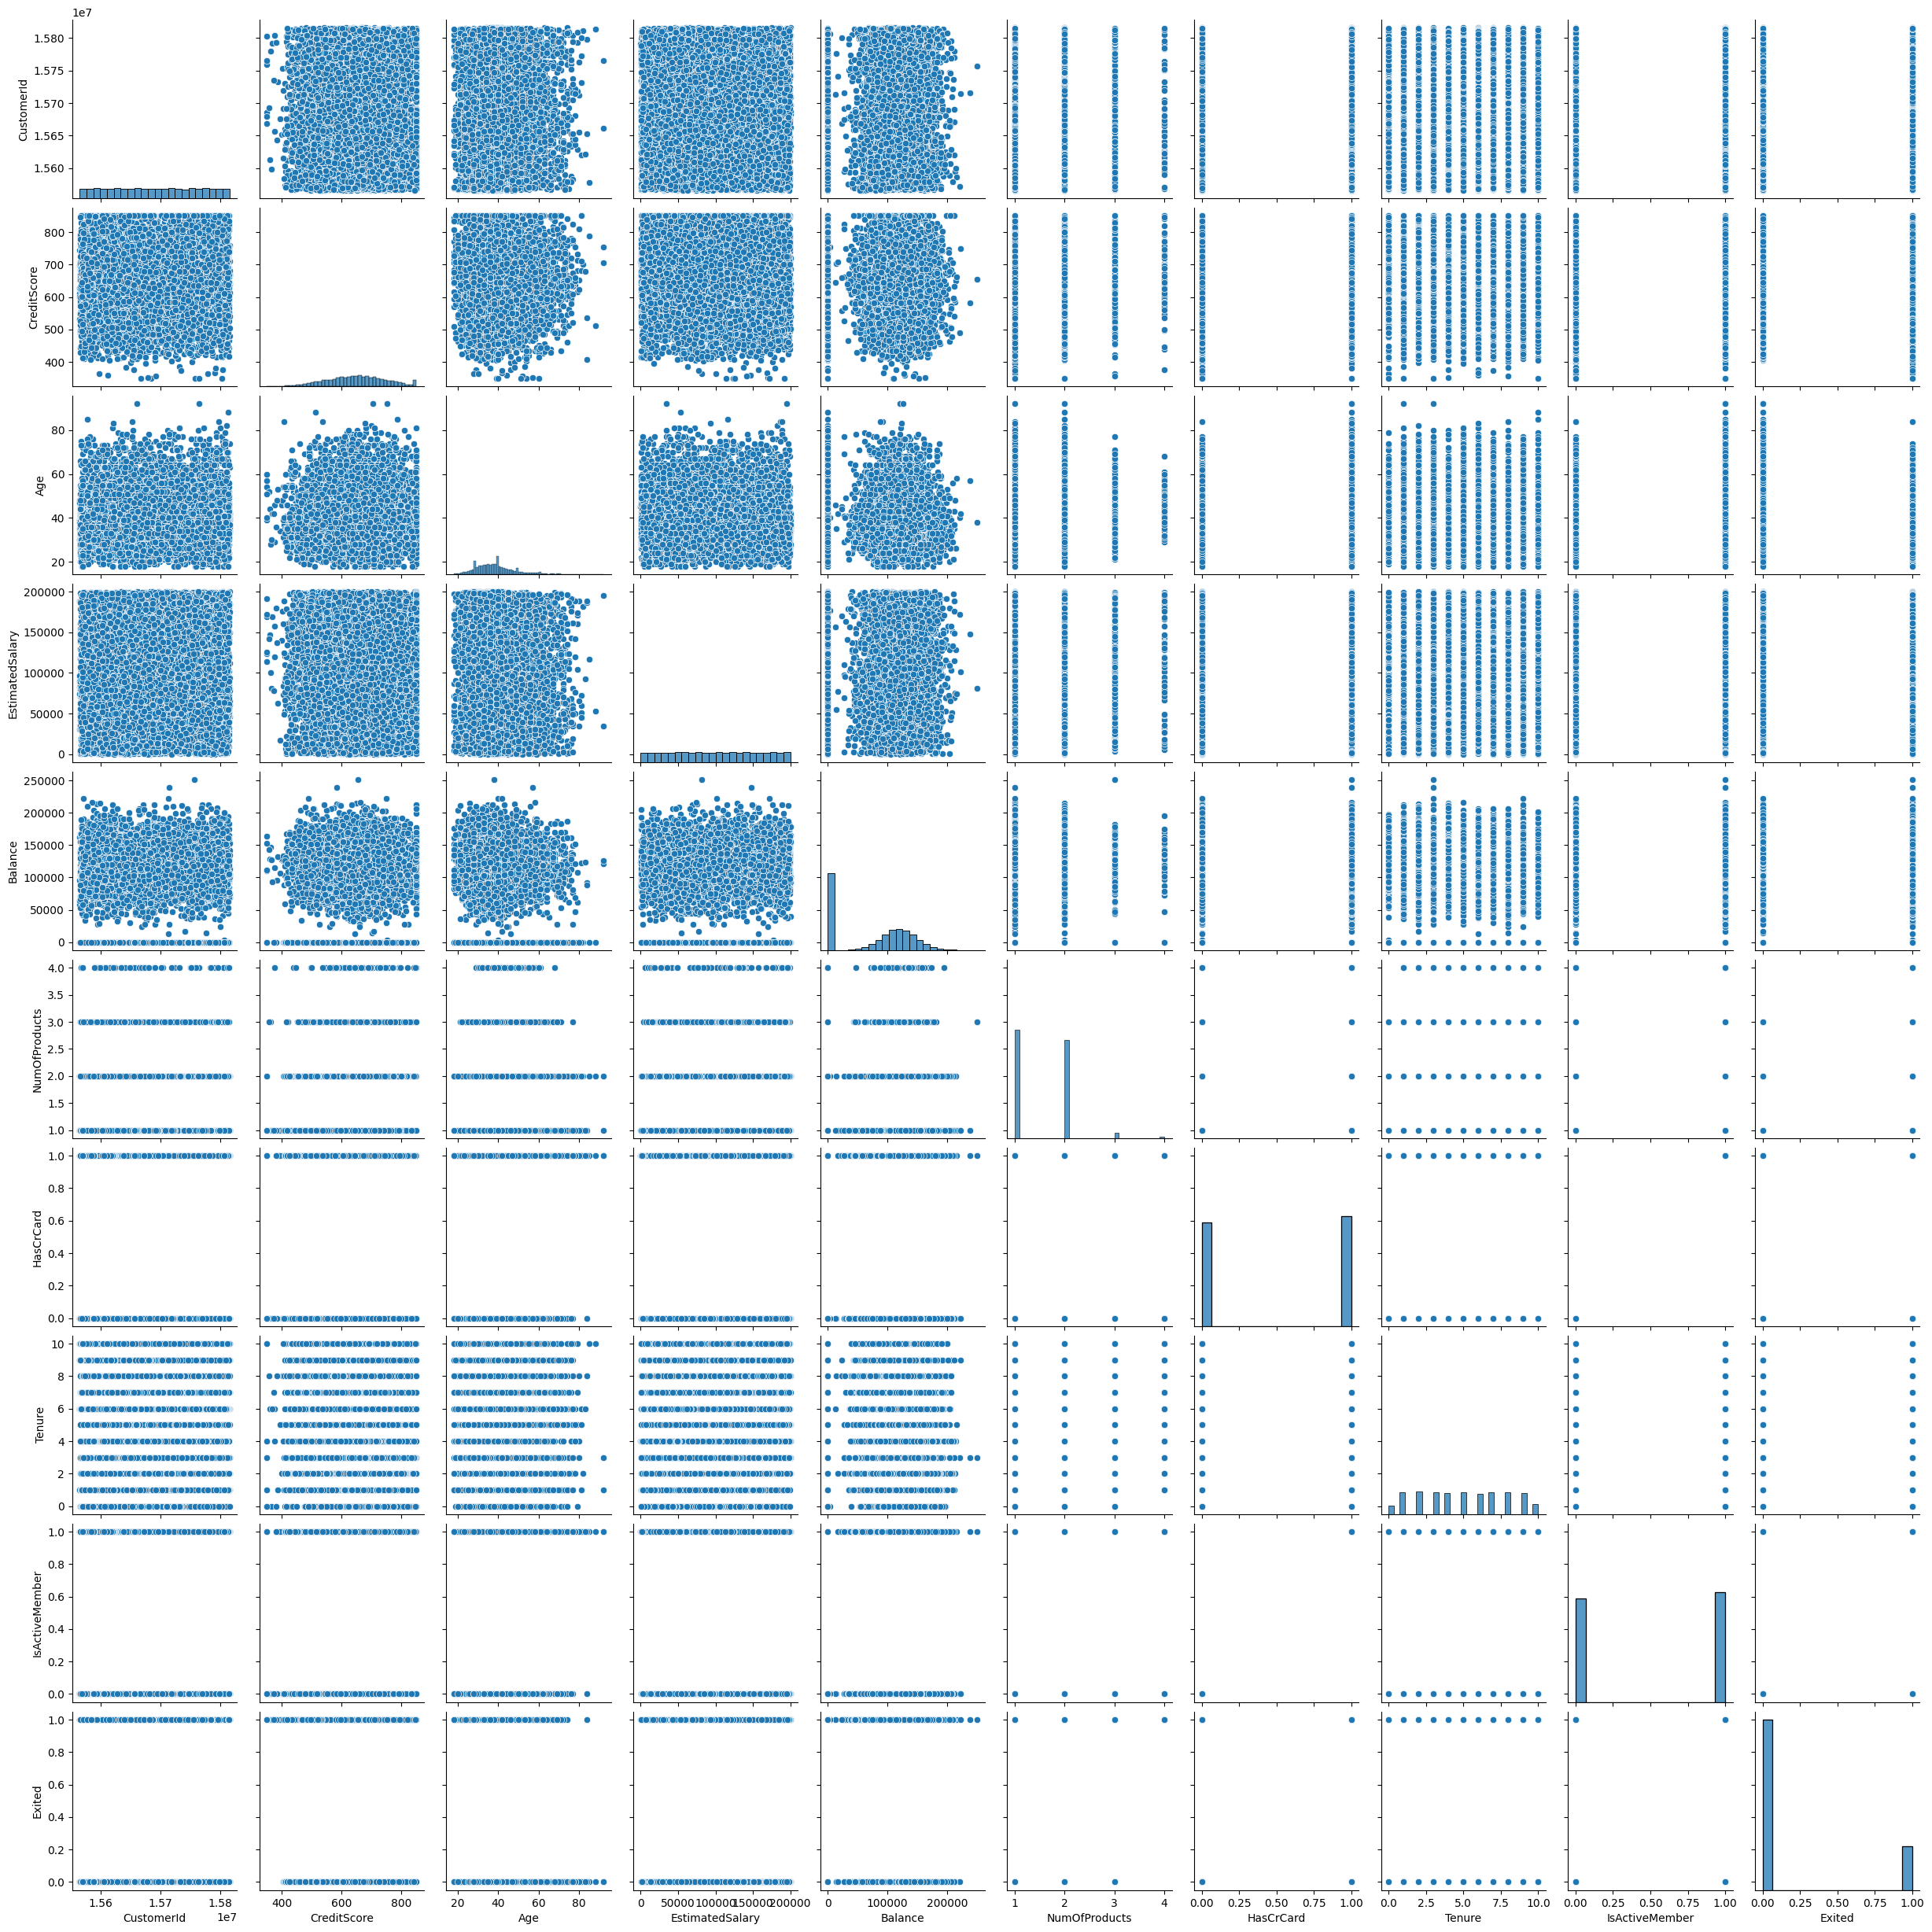

In [367]:
sns.pairplot(final_df)

Inference:
- Balance filed has an outlier at 0 more people seems to have balance 0 
- Estimated salary seem to be uniformly distributed

In [368]:
final_df[final_df.Balance < 1].Exited.value_counts()

Exited
0    3116
1     500
Name: count, dtype: int64

In [369]:
final_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'EstimatedSalary', 'CreditScore_Custom', 'Age_Group_Custom', 'Balance',
       'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember', 'Exited'],
      dtype='object')

Text(0, 0.5, 'Number of Customers')

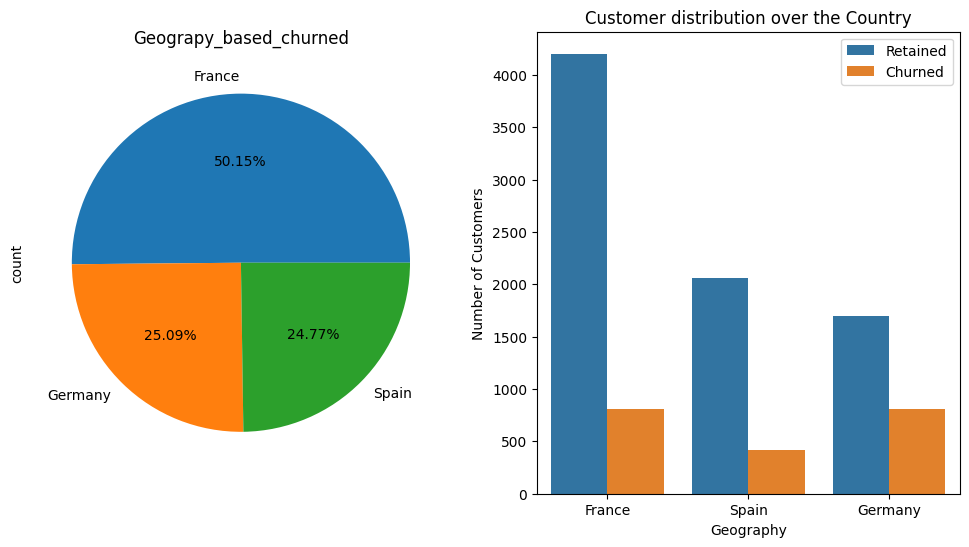

In [370]:
# Country based to understand the cutomer base
import matplotlib.pyplot as plt
import seaborn as sns
f ,axes=plt.subplots(1,2,figsize=(12,6))
final_df.Geography.value_counts().plot(kind='pie',title="Geograpy_based_churned",autopct="%1.2f%%",ax = axes[0])
plt.title('Customer distribution over the Country')
sns.countplot(data=final_df,x='Geography',hue='Exited',ax=axes[1])
plt.legend(labels = ['Retained','Churned'])
plt.ylabel('Number of Customers')

In [371]:
geo_sum = final_df.pivot_table(index='Geography',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()
geo_sum['perc_exited'] = geo_sum[1]/geo_sum['All']
geo_sum


Exited,Geography,0,1,All,perc_exited
0,France,4203,810,5013,0.161580
1,Germany,1694,814,2508,0.324561
2,Spain,2063,413,2476,0.166801
3,All,7960,2037,9997,0.203761


Inference: France holds 50% of the customer base. Whereas the churn rate of the germany ssems to be highter and the retained customers base is also less

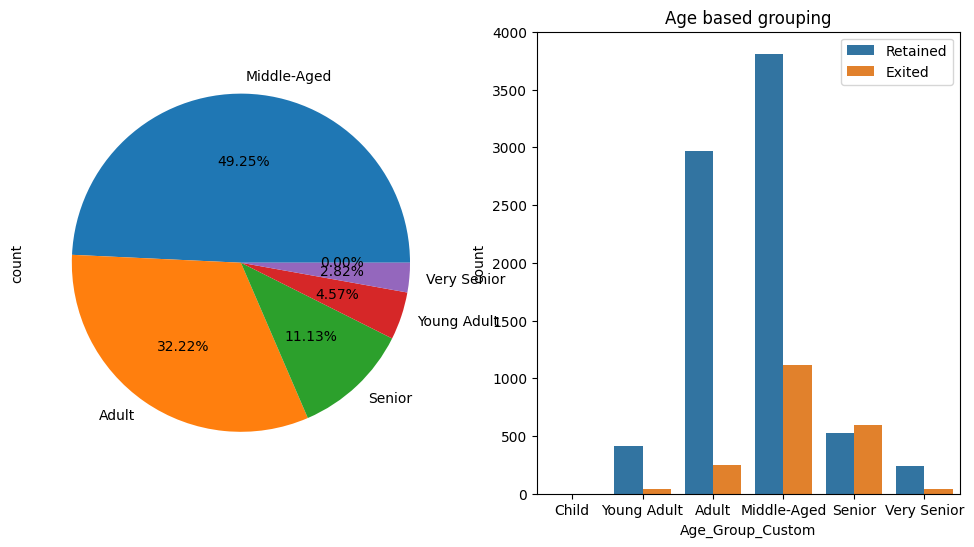

In [372]:
# Age base
fig,axes=plt.subplots(1,2,figsize=(12,6)) 
final_df.Age_Group_Custom.value_counts().plot(kind='pie',autopct ='%1.2f%%',ax=axes[0])
plt.title('Age based grouping')
sns.countplot(data=final_df,x='Age_Group_Custom',hue='Exited',ax = axes[1])
plt.legend(labels = ['Retained','Exited'])


In [373]:
age_sum = final_df.pivot_table(index='Age_Group_Custom',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()
age_sum['perc_exited'] = age_sum[1]/age_sum['All']
age_sum


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9376\2184712126.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_sum = final_df.pivot_table(index='Age_Group_Custom',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()


Exited,Age_Group_Custom,0,1,All,perc_exited
0,Child,0,0,NaN,NaN
1,Young Adult,417,40,457.0,0.087527
2,Adult,2971,250,3221.0,0.077616
3,Middle-Aged,3811,1113,4924.0,0.226036
4,Senior,522,591,1113.0,0.530997
5,Very Senior,239,43,282.0,0.152482
6,All,7960,2037,9997.0,0.203761


Inference: The age group from Young Adult and Adult has < 10%  churnrate compated to others. Seniors having 53%
. Need to see the reason y? 

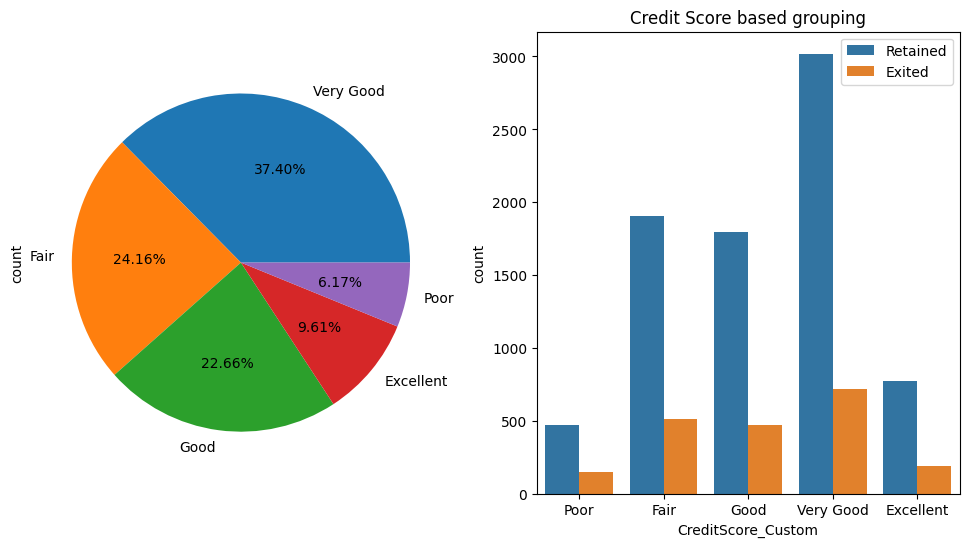

In [374]:
# Credit_based
fig,axes=plt.subplots(1,2,figsize=(12,6)) 
final_df.CreditScore_Custom.value_counts().plot(kind='pie',autopct ='%1.2f%%',ax=axes[0])
plt.title('Credit Score based grouping')
sns.countplot(data=final_df,x='CreditScore_Custom',hue='Exited',ax = axes[1])
plt.legend(labels = ['Retained','Exited'])



In [375]:
cred_sum = final_df.pivot_table(index='CreditScore_Custom',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()
cred_sum['perc_exited'] = cred_sum[1]/cred_sum['All']
cred_sum


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9376\2815009186.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cred_sum = final_df.pivot_table(index='CreditScore_Custom',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()


Exited,CreditScore_Custom,0,1,All,perc_exited
0,Poor,470,147,617,0.238250
1,Fair,1902,513,2415,0.212422
2,Good,1797,468,2265,0.206623
3,Very Good,3020,719,3739,0.192297
4,Excellent,771,190,961,0.197711
5,All,7960,2037,9997,0.203761


Inference: Person with Poor Credit score seems to have 23% of the churn rate



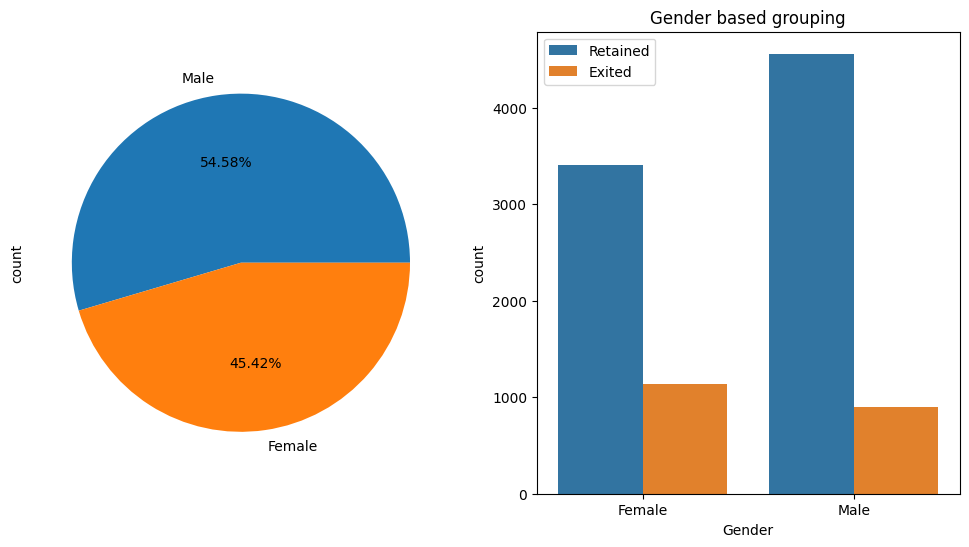

In [376]:
# Gender_based
fig,axes=plt.subplots(1,2,figsize=(12,6)) 
final_df.Gender.value_counts().plot(kind='pie',autopct ='%1.2f%%',ax=axes[0])
plt.title('Gender based grouping')
sns.countplot(data=final_df,x='Gender',hue='Exited',ax = axes[1])
plt.legend(labels = ['Retained','Exited'])



In [377]:
Gender_sum = final_df.pivot_table(index='Gender',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()
Gender_sum['perc_exited'] = Gender_sum[1]/Gender_sum['All']
Gender_sum


Exited,Gender,0,1,All,perc_exited
0,Female,3402,1139,4541,0.250826
1,Male,4558,898,5456,0.164589
2,All,7960,2037,9997,0.203761


Inference: Female has higher churn rate of 25% compared to male 16%

In [378]:
final_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'EstimatedSalary', 'CreditScore_Custom', 'Age_Group_Custom', 'Balance',
       'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember', 'Exited'],
      dtype='object')

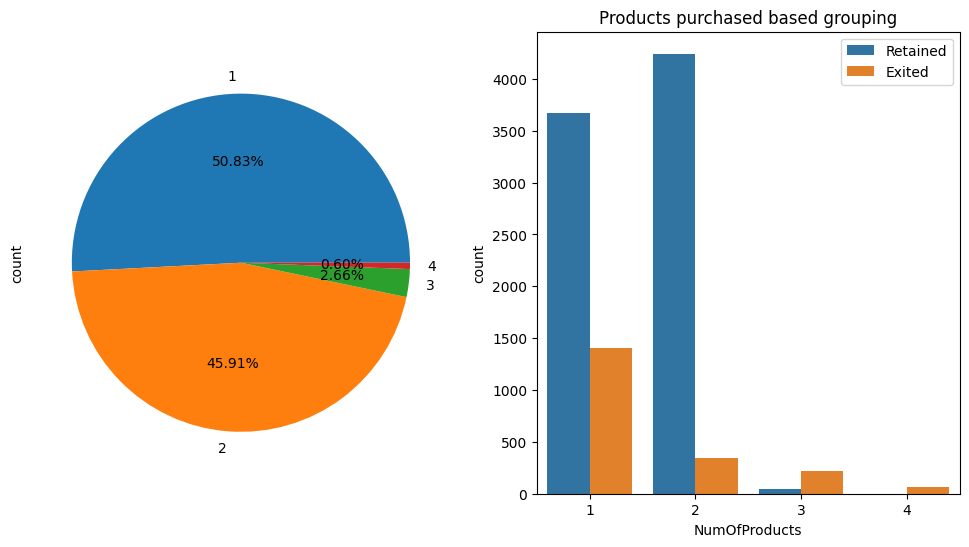

In [379]:
# NumOfProducts_based
fig,axes=plt.subplots(1,2,figsize=(12,6)) 
final_df.NumOfProducts.value_counts().plot(kind='pie',autopct ='%1.2f%%',ax=axes[0])
plt.title('Products purchased based grouping')
sns.countplot(data=final_df,x='NumOfProducts',hue='Exited',ax = axes[1])
plt.legend(labels = ['Retained','Exited'])



In [380]:
prod_sum = final_df.pivot_table(index='NumOfProducts',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()
prod_sum['perc_exited'] = prod_sum[1]/prod_sum['All']
prod_sum


Exited,NumOfProducts,0,1,All,perc_exited
0,1,3672.0,1409.0,5081,0.277308
1,2,4242.0,348.0,4590,0.075817
2,3,46.0,220.0,266,0.827068
3,4,NaN,60.0,60,1.000000
4,All,7960.0,2037.0,9997,0.203761


Inference: The churn rate is kind of high afor 2+ products

In [381]:
final_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'EstimatedSalary', 'CreditScore_Custom', 'Age_Group_Custom', 'Balance',
       'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember', 'Exited'],
      dtype='object')

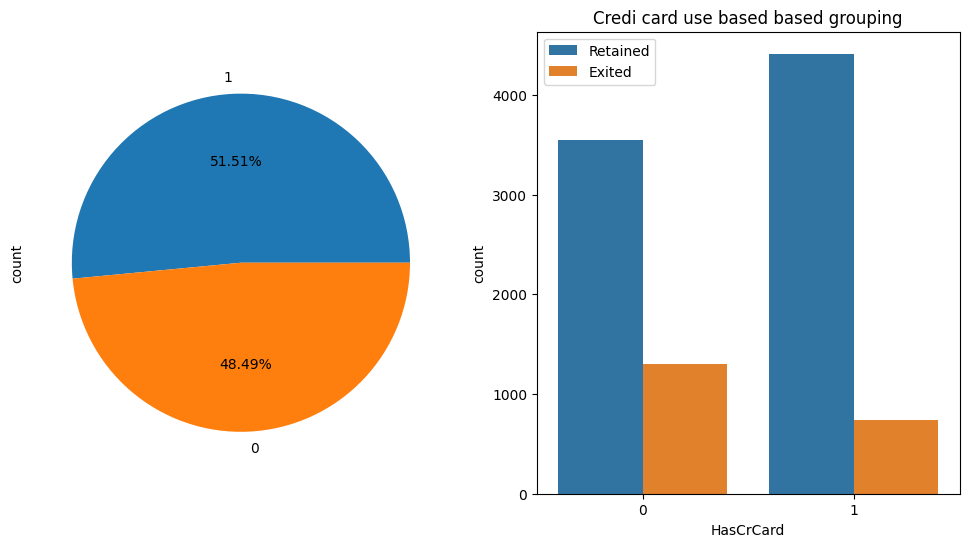

In [382]:
# Creidt card
fig,axes=plt.subplots(1,2,figsize=(12,6)) 
final_df.HasCrCard.value_counts().plot(kind='pie',autopct ='%1.2f%%',ax=axes[0])
plt.title('Credi card use based based grouping')
sns.countplot(data=final_df,x='HasCrCard',hue='Exited',ax = axes[1])
plt.legend(labels = ['Retained','Exited'])


In [383]:
HasCrCard_sum = final_df.pivot_table(index='HasCrCard',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()
HasCrCard_sum['perc_exited'] = HasCrCard_sum[1]/HasCrCard_sum['All']
HasCrCard_sum


Exited,HasCrCard,0,1,All,perc_exited
0,0,3546,1302,4848,0.268564
1,1,4414,735,5149,0.142746
2,All,7960,2037,9997,0.203761


Inference: Person without Credit Card seems to be moving out 26% of them churn out 

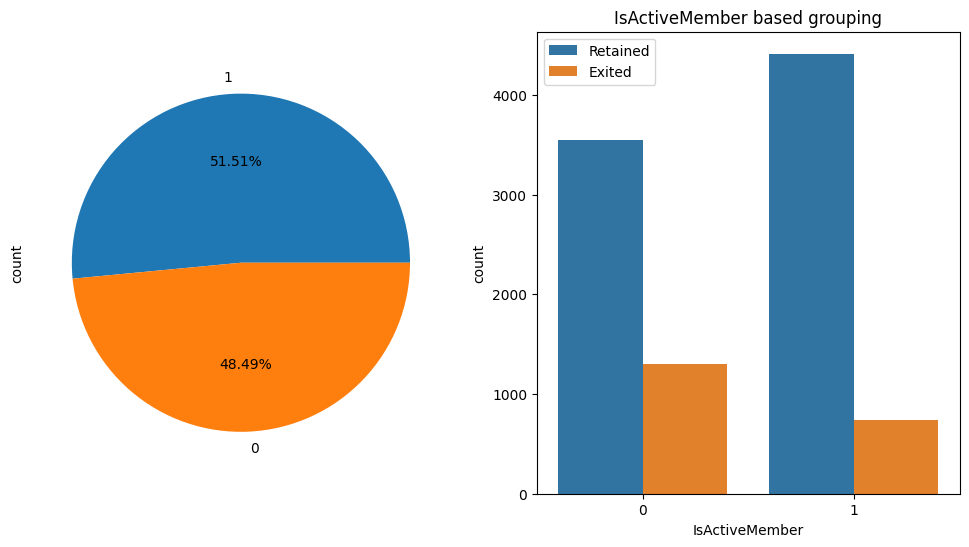

In [384]:
# Creidt card
fig,axes=plt.subplots(1,2,figsize=(12,6)) 
final_df.IsActiveMember.value_counts().plot(kind='pie',autopct ='%1.2f%%',ax=axes[0])
plt.title('IsActiveMember based grouping')
sns.countplot(data=final_df,x='IsActiveMember',hue='Exited',ax = axes[1])
plt.legend(labels = ['Retained','Exited'])


In [385]:
act_member_sum = final_df.pivot_table(index='IsActiveMember',columns = 'Exited',values = 'CustomerId',aggfunc='nunique',margins=True).reset_index()
act_member_sum['perc_exited'] = act_member_sum[1]/act_member_sum['All']
act_member_sum


Exited,IsActiveMember,0,1,All,perc_exited
0,0,3546,1302,4848,0.268564
1,1,4414,735,5149,0.142746
2,All,7960,2037,9997,0.203761


In [386]:
final_df.IsActiveMember.value_counts()

IsActiveMember
1    5149
0    4848
Name: count, dtype: int64

In [387]:
final_df.HasCrCard.value_counts()

HasCrCard
1    5149
0    4848
Name: count, dtype: int64

Inference: There seems to be a relation between the is active member and has_Credit_card. Its better to use single field

In [388]:
final_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'EstimatedSalary', 'CreditScore_Custom', 'Age_Group_Custom', 'Balance',
       'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember', 'Exited'],
      dtype='object')

In [389]:
corr_matrix = final_df[['CreditScore', 'Age','EstimatedSalary', 'Balance','NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember', 'Exited']].corr()

<Axes: >

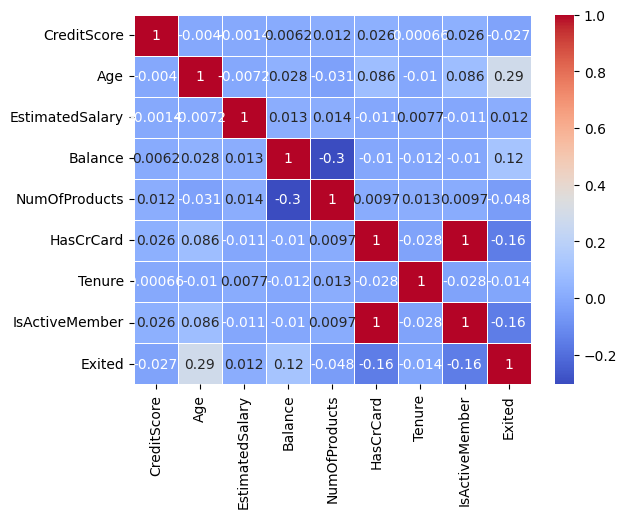

In [390]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

Inference: Correlation Heatmap also points the same story.

- there exist auto correlation between is active member and HasCrCard
- At exited customer point of view,, the age and balance seems to be important feature that contributes a lot to the curn and whenever the member is active there seems to be a negative correlation 

In [391]:
final_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'EstimatedSalary', 'CreditScore_Custom', 'Age_Group_Custom', 'Balance',
       'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember', 'Exited'],
      dtype='object')

In [392]:
final_df.drop(['HasCrCard','Surname'],axis=1,inplace=True)
model_df = final_df.copy(deep=True)


## Final Validation

In [393]:
model_df.head()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,CreditScore_Custom,Age_Group_Custom,Balance,NumOfProducts,Tenure,IsActiveMember,Exited
0,15634602,619,France,Female,42.0,101348.88,Good,Middle-Aged,0.00,1,2,1,1
1,15647311,608,Spain,Female,41.0,112542.58,Good,Middle-Aged,83807.86,1,1,1,0
2,15619304,502,France,Female,42.0,113931.57,Fair,Middle-Aged,159660.80,3,8,0,1
3,15701354,699,France,Female,39.0,93826.63,Very Good,Middle-Aged,0.00,2,1,0,0
4,15737888,850,Spain,Female,43.0,79084.10,Excellent,Middle-Aged,125510.82,1,2,1,0


In [394]:
model_df.isna().sum()

CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
EstimatedSalary       0
CreditScore_Custom    0
Age_Group_Custom      0
Balance               0
NumOfProducts         0
Tenure                0
IsActiveMember        0
Exited                0
dtype: int64

In [395]:
model_df.duplicated().sum()

np.int64(0)

In [396]:
model_df.to_csv('1_prep_data.csv',index=False)